In [1]:
from numpy import array
from os import listdir
from cv2 import imread , imshow ,resize
from glob import glob

In [2]:
dir_dataset='../input/covid19-radiography-database/COVID-19_Radiography_Dataset'
X_train=[]
y_train=[]


In [3]:
code={'COVID':0,'Lung_Opacity':1,'Normal':2,'Viral Pneumonia':3}

In [4]:
for folder in listdir(dir_dataset):
    files =glob(dir_dataset+'//'+folder+'/*.png')
    for file in files :
        img=imread(file)
        X_train.append(list(resize(img,(size,size))))
        y_train.append(code[folder])

In [5]:
X_train=array(X_train)
y_train=array(y_train)

In [6]:
#X_train=X_train/255.0

In [7]:
y_train.shape

(21165,)

In [8]:
from sklearn.utils import shuffle 
X_train ,  y_train = shuffle(X_train, y_train, random_state=0) 

In [9]:
from keras.models import Sequential
from keras.layers import Dense ,Flatten ,Conv2D ,MaxPooling2D ,Dropout ,BatchNormalization
from keras.optimizers import Adam 
from keras.callbacks import EarlyStopping ,ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator 


In [10]:
"""from keras.applications import ResNet50
ResNet=ResNet50(include_top=False,weights='imagenet',input_shape=(size,size,3))"""

"from keras.applications import ResNet50\nResNet=ResNet50(include_top=False,weights='imagenet',input_shape=(size,size,3))"

In [11]:
optimizer=Adam(lr=0.001,beta_1=0.9,beta_2=0.999)

In [22]:
EarlyStop=EarlyStopping(patience=10,restore_best_weights=True)
Reduce_LR=ReduceLROnPlateau(monitor='val_acc',verbose=2,factor=0.5,min_lr=0.00001)
callback=[EarlyStop , Reduce_LR]

In [13]:
"""from tensorflow.python.keras.preprocessing.image import ImageDataGenerator

image_gen = ImageDataGenerator(
    
    rescale=1./255,
    rotation_range=15,
    width_shift_range=.15,
    height_shift_range=.15,
    horizontal_flip=True)


image_gen.fit(X_train, augment=True)"""

'from tensorflow.python.keras.preprocessing.image import ImageDataGenerator\n\nimage_gen = ImageDataGenerator(\n    \n    rescale=1./255,\n    rotation_range=15,\n    width_shift_range=.15,\n    height_shift_range=.15,\n    horizontal_flip=True)\n\n\nimage_gen.fit(X_train, augment=True)'

In [14]:
model=Sequential([
    Conv2D(32,3,padding='valid',activation='relu',input_shape=(size,size,3)),
    Conv2D(64,3,padding='valid',activation='relu'),
    MaxPooling2D(3,2),
    Conv2D(128,2,padding='valid',activation='relu'),
    MaxPooling2D(3,3),
    MaxPooling2D(3,3),
    Flatten(),
    Dense(512,activation='relu'),
    BatchNormalization(),
    Dropout(0.1),
    Dense(256,activation='relu'),
    BatchNormalization(),
    Dropout(0.1),
    Dense(64,activation='relu'),
    BatchNormalization(),
    Dropout(0.25),
    Dense(32,activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(4,activation='softmax')
])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 109, 109, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 128)     32896     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 128)       0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 18432)             0

In [16]:
model.compile(optimizer=optimizer,loss='sparse_categorical_crossentropy', metrics=["accuracy"])

In [25]:
history=model.fit(X_train,y_train,validation_split=0.1,epochs=30,batch_size=32, callbacks=callback, verbose=1)

Epoch 1/30
596/596 [==============================] - 35s 59ms/step - loss: 0.2254 - accuracy: 0.9184 - val_loss: 0.3196 - val_accuracy: 0.8838
Epoch 2/30
596/596 [==============================] - 35s 58ms/step - loss: 0.2150 - accuracy: 0.9211 - val_loss: 0.5027 - val_accuracy: 0.8351
Epoch 3/30
596/596 [==============================] - 35s 59ms/step - loss: 0.1997 - accuracy: 0.9284 - val_loss: 0.3771 - val_accuracy: 0.8819
Epoch 4/30
596/596 [==============================] - 35s 59ms/step - loss: 0.2239 - accuracy: 0.9184 - val_loss: 0.6370 - val_accuracy: 0.7870
Epoch 5/30
596/596 [==============================] - 35s 59ms/step - loss: 0.1961 - accuracy: 0.9282 - val_loss: 0.3724 - val_accuracy: 0.8838
Epoch 6/30
596/596 [==============================] - 35s 59ms/step - loss: 0.1950 - accuracy: 0.9303 - val_loss: 0.3303 - val_accuracy: 0.8824
Epoch 7/30
596/596 [==============================] - 35s 59ms/step - loss: 0.1485 - accuracy: 0.9465 - val_loss: 0.3576 - val_accuracy:

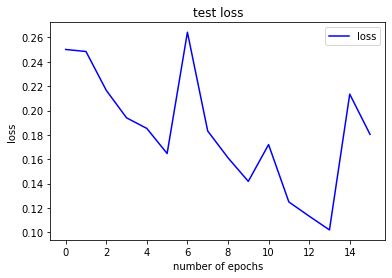

In [24]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],color='b',label='loss')
plt.title("test loss")
plt.xlabel("number of epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

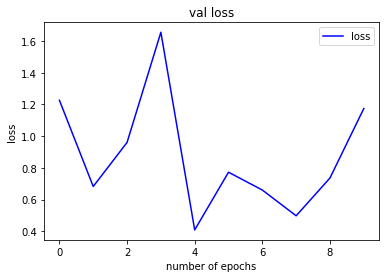

In [19]:
plt.plot(history.history['val_loss'],color='b',label='loss')
plt.title("val loss")
plt.xlabel("number of epochs")
plt.ylabel("loss")
plt.legend()
plt.show()